In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

# Loading Models
The process for loading a model includes re-creating the model structure and loading the state dictionary into it.

In [3]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [4]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model_predict.pth"))

<All keys matched successfully>

This model can now be used to make predictions.

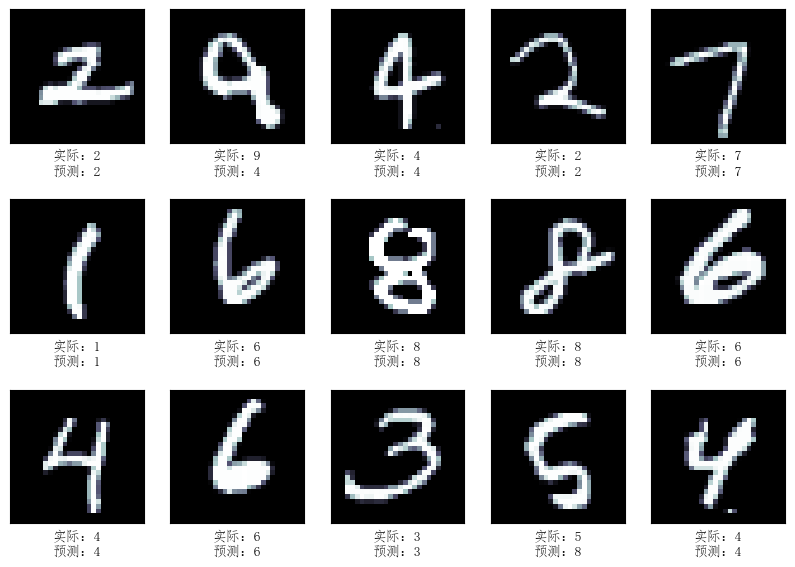

In [5]:
model.eval()

with torch.no_grad():
    fig, ax = plt.subplots(3, 5, figsize=(10, 7))  # 创建一个3行5列的画布
    for i, axi in enumerate(ax.flat):
        t = int(torch.randint(low=0, high=10000, size=(1, 1))[0][0])  # 生成随机整数t作为测试集的下标，可随机选取测试集中的图片
        x, y = test_data[t][0], test_data[t][1]
        x = x.to(device)
        pred = model(x)
        pred = model(x)
        predicted, actual = pred[0].argmax(0), y
        axi.imshow(x.reshape(28, 28), cmap="bone")  # 绘制图像
        axi.set(xticks=[], yticks=[])
        axi.set_xlabel(f"实际：{actual}\n预测：{predicted}")
    plt.rcParams["font.sans-serif"] = "FangSong"
    plt.show()

In [6]:
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = pred[0].argmax(0), y
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "7", Actual: "7"


In [7]:
activation_values = []
# 定义一个函数来获取并存储 激活值
def get_activations(model, x):
    for name, module in model.named_modules():
        # print(f"name: {name}, module: {module}")
        if isinstance(module, nn.Linear):  # 若模块是线性层（全连接层）
            x = module(x)
            activation_values.append(x.detach().numpy())  # 存储激活值
            x = torch.relu(x)  # 假设使用ReLU激活函数
# 调用函数进行前向传播并收集激活值
get_activations(model, x.reshape(-1))

# 输出隐藏层的激活值
for i, activation in enumerate(activation_values):
    print(f"第{i}层的激活值:")
    print(activation)

第0层的激活值:
[ 1.8419417   0.45955932  0.9303726   0.17657423  0.57474416  1.5134944
  1.6481627   2.1417694   0.32862657  0.34110937  0.19295855  2.2690623
  0.52220345  0.10260595  0.38672328  1.1976894   1.6454458   0.04823941
  0.31098086  0.58591974  0.38155356  0.9900326  -0.33327943  1.9660189
 -0.01991515  1.0402255   0.22564879  1.7619185   0.3009812  -0.03302579
  2.9733975   1.0492556   2.207335   -0.29014948  1.0802828  -0.66416293
  0.50504965  0.75557196  0.6523521   0.15277874  0.07193144  0.40719178
  0.6401769   1.6289287  -0.30295634 -0.5843714   1.4234806   0.4249147
  0.453288    1.2212422   0.11285638 -0.05012044  0.6811222   1.5449661
  0.45299512  0.24615023  0.15953594  0.24232993  0.13841447  1.6561931
 -0.08242088  2.5024858   1.5567195   1.2763531 ]
第1层的激活值:
[ 3.0888743e+00  3.0814552e-01  1.7343725e+00  8.8887531e-01
  8.2174522e-01  3.1935400e-01  1.1295403e+00  3.5939543e+00
 -4.7790810e-01 -5.5011702e-01 -1.7139647e+00  9.2134029e-01
  5.0951242e-03  1.608054